<a href="https://colab.research.google.com/github/DepartmentOfStatisticsPUE/air-2024/blob/main/notebooks/2_laczenie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
wyn = pd.read_excel("/content/wynag-powiaty.xlsx",
                    sheet_name = 1)
nie = pd.read_excel("/content/nieruch-powiaty.xlsx",
                    sheet_name = "DANE")
nie.head()

,Kod,Nazwa,Transakcje rynkowe,Powierzchnia użytkowa lokali mieszkalnych,Rok,Wartosc,Jednostka miary,Atrybut
0,261000,Powiat m. Jelenia Góra,rynek wtórny,ogółem,2021,235712,zł,
1,261000,Powiat m. Jelenia Góra,rynek wtórny,ogółem,2022,266242,zł,
2,262000,Powiat m. Legnica,rynek wtórny,ogółem,2021,250244,zł,
3,262000,Powiat m. Legnica,rynek wtórny,ogółem,2022,268053,zł,
4,264000,Powiat m. Wrocław,rynek wtórny,ogółem,2021,445419,zł,


Łączymy dane wykorzystując dwa identyfikatory: Kod i Rok.

Wykorzystujemy łączenie typu inner join

In [4]:
zb1 = pd.merge(
    left = wyn[["Kod", "Rok", "Wartosc"]],
    right = nie[["Kod", "Rok", "Wartosc"]],
    on = ["Kod", "Rok"],
    how = "inner",
)

In [5]:
zb2 = pd.merge(
    left = wyn[["Kod", "Rok", "Wartosc"]],
    right = nie[["Kod", "Rok", "Wartosc"]],
    on = ["Kod", "Rok"],
    how = "left",
)
zb2.head()

,Kod,Rok,Wartosc_x,Wartosc_y
0,201000,2021,5461.94,NaN
1,201000,2022,6181.60,NaN
2,202000,2021,5127.97,NaN
3,202000,2022,5723.65,NaN
4,203000,2021,5171.28,NaN


Sprawdzamy jak wygląda zależność między wynagrodzeniem, a ceną nieruchomości na wtórnym rynku

<Axes: xlabel='Wartosc_x', ylabel='Wartosc_y'>

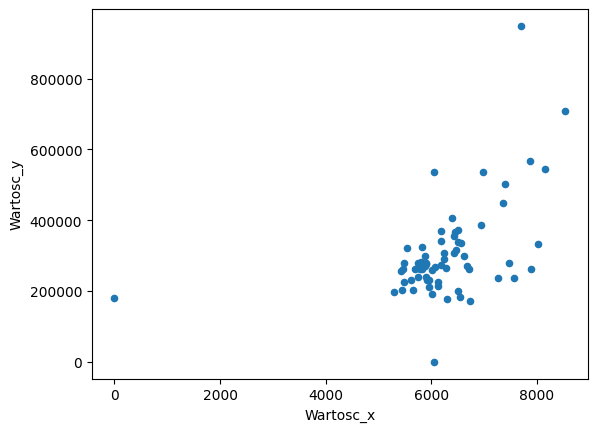

In [6]:
zb1[zb1["Rok"] == 2022].plot.scatter(x = "Wartosc_x", y = "Wartosc_y")

In [7]:
zb1[zb1["Rok"] == 2022][(zb1["Wartosc_y"] == 0) | (zb1["Wartosc_x"] == 0)]

<ipython-input-7-e269651adc58>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zb1[zb1["Rok"] == 2022][(zb1["Wartosc_y"] == 0) | (zb1["Wartosc_x"] == 0)]


,Kod,Rok,Wartosc_x,Wartosc_y
87,2467000,2022,0.00,180006
127,3261000,2022,6054.77,0


In [8]:
wyn[wyn["Kod"].isin([2467000, 3261000])]

,Kod,Nazwa,Wyszczególnienie,Rok,Wartosc,Jednostka miary,Atrybut
552,2467000,Powiat m. Jastrzębie-Zdrój,ogółem,2021,8987.51,zł,
553,2467000,Powiat m. Jastrzębie-Zdrój,ogółem,2022,0.00,zł,x
754,3261000,Powiat m. Koszalin,ogółem,2021,5496.02,zł,
755,3261000,Powiat m. Koszalin,ogółem,2022,6054.77,zł,


Zapoznajemy się z opcjami read_excel

In [32]:
wyn2 = pd.read_excel("/content/wynag-powiaty.xlsx",
                     sheet_name = 1,
                     names = ["kod", "pow", "typ", "rok", "wyn", "jedn", "atr"],
                     dtype = {"kod": str, "wyn": np.float64},
                     usecols = "A:E",
                     na_values= "0")
wyn2[wyn2["kod"] == "2467000"]

,kod,pow,typ,rok,wyn
552,2467000,Powiat m. Jastrzębie-Zdrój,ogółem,2021,8987.51
553,2467000,Powiat m. Jastrzębie-Zdrój,ogółem,2022,NaN


In [40]:
nie2 = pd.read_excel("/content/nieruch-powiaty.xlsx",
                     sheet_name = 1,
                     names = ["kod", "pow", "typ", "ogolem", "rok", "wyn", "jedn", "atr"],
                     dtype = {"kod": str, "wyn": np.float64},
                     usecols = "A:F",
                     na_values= [0, 0.0])

nie2[nie2["wyn"] == 0] ## nie dziala

,kod,pow,typ,ogolem,rok,wyn
126,3261000,Powiat m. Koszalin,rynek wtórny,ogółem,2021,0.0
127,3261000,Powiat m. Koszalin,rynek wtórny,ogółem,2022,0.0
